# **PINTEREST APP REVIEW ANALYSIS**

1. Performing Exploratory Data Analysis on the dataset
2. Creating a Word Cloud
3. Performing Sentiment Analysis
4. Classification model that predicts the Review Rating

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/Users/manvigawande/Downloads/PINTEREST_REVIEWS.csv', nrows= 50000)

# **Exploratory Data Analysis**

**Shape of the data** : (50000,9)

**Missing Values**: 2293 for author_app_version which was handled using KNN and 1 missing value of review_text was dropped

**Histogram plots:**

The diagonal cells contain histograms representing the distribution of individual features, like Unnamed: 0, review_rating, review_likes, and author_app_version.

For instance, review_rating has multiple peaks, which may suggest different levels of user ratings.

review_likes has values mostly concentrated at lower counts, suggesting that most reviews have fewer likes.

author_app_version appears to have very limited variability, likely with most users using the same version of the app.



**Scatter plots:**

These cells show scatter plots for each pair of variables, helping to visualize potential correlations or patterns.

Unnamed: 0 vs. other variables: This may represent an index or unique identifier column, as it does not seem to have a meaningful relationship with other features.

review_rating vs. review_likes: There is a concentration of points at certain rating values, which might indicate that certain ratings are more common or associated with a higher number of likes.

review_rating vs. author_app_version: Since author_app_version has low variability, the scatter plot shows clustered points, indicating most users likely use the same app version regardless of their rating.



**Notable Observations:**

There is little variation in the author_app_version variable, as it clusters around a single value, suggesting that the majority of users are using the same version.

review_likes has a few high outliers but mostly remains at lower values, showing that only a few reviews receive a significant number of likes.




Overall, this pairplot helps in identifying relationships (or the lack thereof) between features, outliers, and the distribution of each feature individually.


In [ ]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,NaN,2012-08-15 02:41:03
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,NaN,2012-08-15 02:43:15
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,NaN,2012-08-15 02:43:52
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,NaN,2012-08-15 02:51:51


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          50000 non-null  int64 
 1   review_id           50000 non-null  object
 2   pseudo_author_id    50000 non-null  object
 3   author_name         50000 non-null  object
 4   review_text         49999 non-null  object
 5   review_rating       50000 non-null  int64 
 6   review_likes        50000 non-null  int64 
 7   author_app_version  47706 non-null  object
 8   review_timestamp    50000 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


In [ ]:
df.describe()

,Unnamed: 0,review_rating,review_likes
count,50000.000000,50000.000000,50000.000000
mean,24999.500000,4.719280,0.089020
std,14433.901067,0.656845,2.566918
min,0.000000,1.000000,0.000000
25%,12499.750000,5.000000,0.000000
50%,24999.500000,5.000000,0.000000
75%,37499.250000,5.000000,0.000000
max,49999.000000,5.000000,297.000000


In [ ]:
df.shape

(50000, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0               0
review_id                0
pseudo_author_id         0
author_name              0
review_text              1
review_rating            0
review_likes             0
author_app_version    2294
review_timestamp         0
dtype: int64

In [ ]:
df.dropna(subset=['review_text'], axis=0, inplace=True)


In [ ]:
df.isnull().sum()

Unnamed: 0               0
review_id                0
pseudo_author_id         0
author_name              0
review_text              0
review_rating            0
review_likes             0
author_app_version    2293
review_timestamp         0
dtype: int64

In [ ]:

import pandas as pd

def version_to_float(version):

    if isinstance(version, (float, int)):
        return version

    try:
        major, minor, patch = map(int, version.split('.'))
        return major + minor / 10 + patch / 100
    except (ValueError, AttributeError):
        return float('nan')
df['author_app_version'] = df['author_app_version'].apply(version_to_float)

imputer = KNNImputer(n_neighbors=5)
df['author_app_version'] = imputer.fit_transform(df[['author_app_version']])

In [ ]:
users = df['author_name'].value_counts()

<BarContainer object of 1 artists>

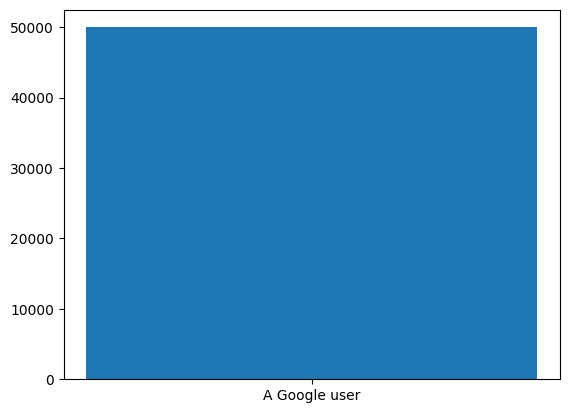

In [ ]:
plt.bar(users.index,users.values)

<Figure size 1500x1000 with 0 Axes>

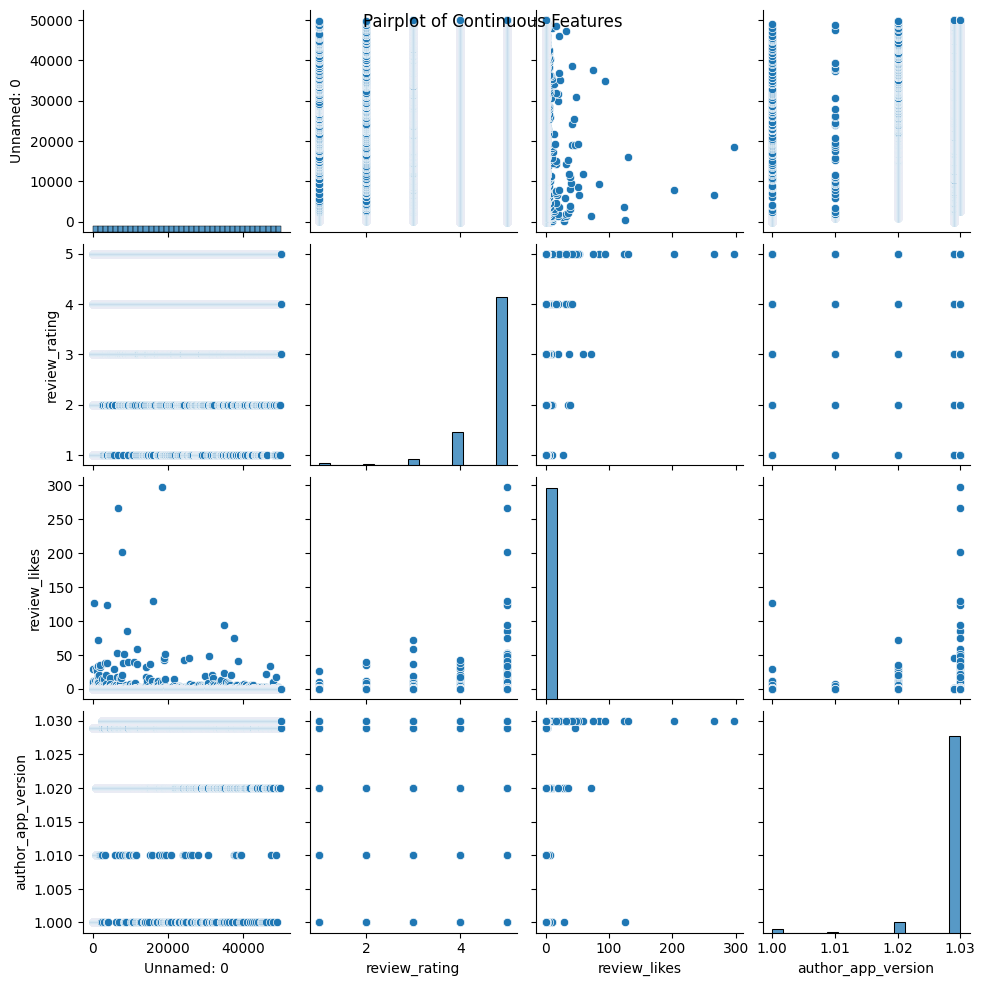

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Continuous Features')
plt.show()

In [ ]:
df['review_rating'].corr(df['review_likes'],method='pearson')

-0.009803983946798461

In [ ]:
df['author_app_version'].corr(df['review_rating'],method='pearson')

0.1217779825070135

In [ ]:
df['author_app_version'].corr(df['review_likes'],method='pearson')

-0.021542970987048493

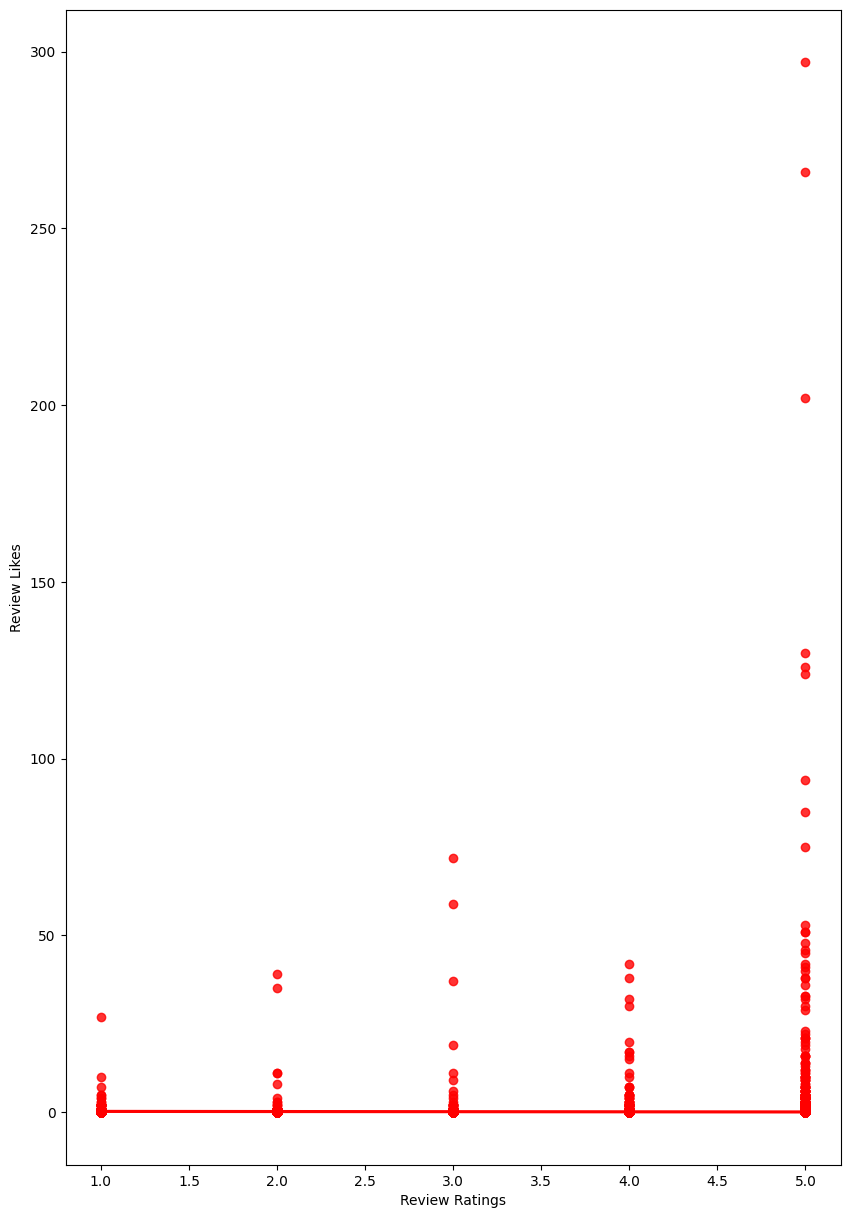

In [ ]:
plt.figure(figsize=(10,15))
sns.regplot(data = df,x='review_rating',y='review_likes',color='red')
plt.xlabel('Review Ratings')
plt.ylabel('Review Likes')
plt.show()

# **CREATING A WORDCLOUD**

Creating the wordcloud shows that Love is one of the most common words used in the app review making it a positive review about the app.

In [ ]:
import string
punctuations_list = string.punctuation

In [ ]:
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

In [ ]:
df['review_text'] = df['review_text'].apply(lambda x: remove_punctuations(x))
df['pseudo_author_id'] = df['pseudo_author_id'].apply(lambda x: remove_punctuations(x))
df['author_name'] = df['author_name'].apply(lambda x: remove_punctuations(x))
#df['review_id'] = df['reveiw_id'].apply(lambda x: remove_punctuations(x))
#df['author_app_version'] = df['author_app_version'].apply(lambda x: remove_punctuations(x))
df['review_timestamp'] = df['review_timestamp'].apply(lambda x: remove_punctuations(x))

In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/shrutim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    important_words = []

    for word in str(text).split():

        if word not in stop_words:

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            important_words.append(word)

    output = " ".join(important_words)

    return output

In [ ]:
df['review_text'] = df['review_text'].apply(lambda x: remove_stopwords(x))

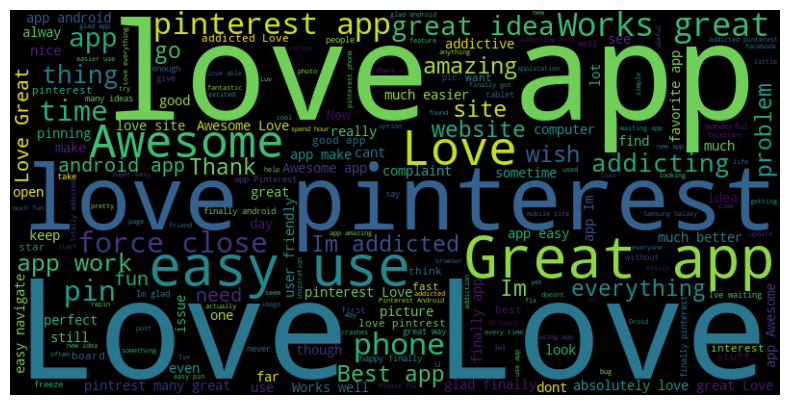

In [ ]:
text = " ".join(review for review in df['review_text'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Sentiment Analysis**

The Sentiment about the app review is very positive.The graph below shows that left bar has a sentiment score around -0.25 which represents negative or neutral sentiments with a lower count. The right bar near 1.0 represents positive sentiments with a much higher count.


---



In [ ]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(str(text))
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment
df['sentiment'] = df['review_text'].apply(get_sentiment)


In [ ]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,sentiment
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally official interest android app,5,2,1.028944,20120815 024103,1
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,1.028944,20120815 024315,1
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread,5,0,1.028944,20120815 024352,0
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad finally got Pinterest app Looks beauti...,5,7,1.000000,20120815 024959,1
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wowthanks finally supporting android,5,0,1.028944,20120815 025151,1


In [ ]:
sentiments = df['sentiment'].value_counts()

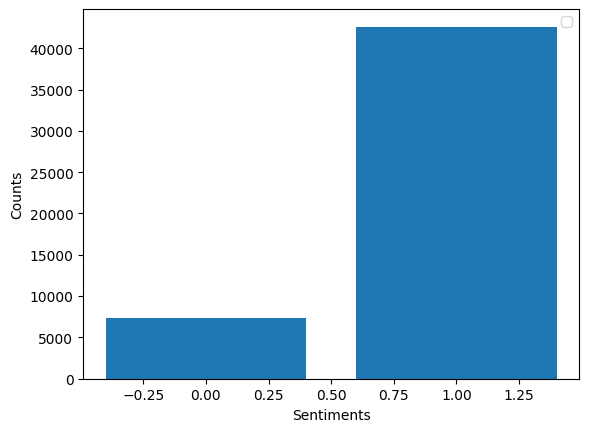

In [ ]:
plt.bar(sentiments.index,sentiments.values)
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer_matrix = vectorizer.fit_transform(df['review_text'])



In [ ]:
vectorizer_matrix_2 = vectorizer.fit_transform(df['review_text'])

In [ ]:
df1 = pd.DataFrame(vectorizer_matrix.toarray(),columns=vectorizer.get_feature_names_out())

In [ ]:
df2 = pd.DataFrame(vectorizer_matrix_2.toarray(),columns=vectorizer.get_feature_names_out())

In [ ]:
df1 = pd.concat([df1,df2],axis=1)

In [ ]:
df1.head()

,10,100,1000,10000,1000000,100000000,100am,100s,100x,100xs,...,다른,대박,되네,되는데,비교하게,없고,외에,이건,인스타그램하고,필터가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_columns = df[['review_likes','review_rating','author_app_version']]

In [ ]:
df1 = pd.concat([df1,selected_columns],axis=1)

In [ ]:
df1.head()

,10,100,1000,10000,1000000,100000000,100am,100s,100x,100xs,...,되는데,비교하게,없고,외에,이건,인스타그램하고,필터가,review_likes,review_rating,author_app_version
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.028944
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.028944
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.028944
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.028944


In [ ]:
df1.isnull().sum()

10                    1
100                   1
1000                  1
10000                 1
1000000               1
                     ..
인스타그램하고               1
필터가                   1
review_likes          1
review_rating         1
author_app_version    1
Length: 20403, dtype: int64

In [ ]:
df1.dropna(axis=0,inplace=True)

In [ ]:
df1.isnull().sum()

10                    0
100                   0
1000                  0
10000                 0
1000000               0
                     ..
인스타그램하고               0
필터가                   0
review_likes          0
review_rating         0
author_app_version    0
Length: 20403, dtype: int64

# **Predicting the Review Rating**

The model that performs the best is RandomForestClassifier and the accuracy is 79.51 with an F1 score 70.4%

In [ ]:
X = df1.drop('review_rating',axis=1)
y = df1['review_rating']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

In [ ]:

from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
def evaluate_model(model, X, y_true, set_name="Set"):
    y_pred = model.predict(X)
    print(f"Performance on {set_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\n")


In [ ]:
lr = LogisticRegression(multi_class='multinomial',solver = 'lbfgs',C=1)
lr.fit(X_train,y_train)


LogisticRegression(C=1, multi_class='multinomial')

In [ ]:
evaluate_model(lr,X_test,y_test)

Performance on Set:
Accuracy: 0.7933
Precision: 0.6803667311048464
Recall: 0.7933
F1 Score: 0.7075974754682879




In [ ]:
rfc = RandomForestClassifier(criterion='gini',max_depth = 50,min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=10)

In [ ]:
evaluate_model(rfc,X_test,y_test)

Performance on Set:
Accuracy: 0.7951
Precision: 0.63218401
Recall: 0.7951
F1 Score: 0.7043440588268063




In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
evaluate_model(dtc,X_test,y_test)

Performance on Set:
Accuracy: 0.7247
Precision: 0.66885215084917
Recall: 0.7247
F1 Score: 0.6931781984438238




In [ ]:
svm = SVC(C= 0.01, degree= 3, kernel = 'poly')
svm.fit(X_train,y_train)

In [ ]:
evaluate_model(svm,X_test,y_test)

Performance on Set:
Accuracy: 0.787
Precision: 0.619369
Recall: 0.787
F1 Score: 0.6931941801902629


